In [99]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd

df = pd.read_csv("~/Documents/clean_coaster_full.csv")
# df = df.fillna('M')

In [100]:
pd.set_option('display.max_rows', 10)
df

,coaster_name,Length,Location,Status,Manufacturer,Model,Height,launch_system,Duration,year_introduced,Type_Main,speed_mph,Inversions_clean,Gforce_clean,coaster_rating
0,10 Inversion Roller Coaster,2788.8,Chimelong Paradise,Operating,Intamin,Looping Coaster,98.4,Other,92.0,2006,Steel,45.0,10,NaN,49.4
1,Abyss,2070.0,Adventure World,Operating,Gerstlauer,Euro-Fighter,98.0,Chain Lift,120.0,2013,Steel,52.8,3,4.5,64.1
2,Abyssus,4317.6,Energylandia,Operating,Vekoma,Other,126.3,LSM Launch,NaN,2021,Steel,62.1,4,4.5,91.7
3,Accelerator,590.0,Drayton Manor Theme Park,Operating,Vekoma,Family Coaster,66.0,Other,NaN,2011,Steel,37.3,0,3.0,41.8
4,Acrobat,3349.8,Nagashima Spa Land,Operating,Bolliger & Mabillard,Other,141.1,Chain Lift,180.0,2015,Steel,55.9,4,NaN,88.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,Zadra,4318.0,Energylandia,Operating,Rocky Mountain Construction,Other,206.0,Chain Lift,110.0,2019,Other,75.2,3,4.0,99.7
896,Zeus,2900.0,Mt. Olympus Water & Theme Park,Operating,Custom Coasters International,Other,90.0,Other,85.0,1997,Wood,60.0,0,NaN,72.7
897,Zippin Pippin,2865.0,Bay Beach,Operating,The Gravity Group,Wooden Out and Back,70.0,Chain Lift,118.0,1912,Wood,40.0,0,NaN,79.2
898,Zoomerang,935.0,Lake Compounce,Operating,Vekoma,Boomerang,116.5,Other,108.0,1997,Steel,47.0,3,5.2,14.9


In [83]:
import numpy as np

variables = {
    'Length': [0, 1000, 2000, 3000, 3500, 4500, np.inf],
    'Height': [0, 50, 75, 100, 125, 175, 225, np.inf],
    'Duration': [0, 49, 69, 89, 109, 139, 159, np.inf],
    'speed_mph': [0, 31, 39, 49, 59, 69, np.inf],  
    'Gforce_clean': [0, 2.6, 3.49, 3.99, 4.49, 4.99, np.inf]
}

labels_dict = {
    'Length': ['0-1000', '1000-2000', '2000-3000', '3000-3500', '3500-4500', '4500+'],
    'Height': ['0-50', '50-75', '75-100', '100-125', '125-175', '175-225', '225+'],
    'Duration': ['0-49', '49-69', '69-89', '89-109', '109-139', '139-159', '159+'],
    'speed_mph': ['0-31', '31-39', '39-49', '49-59', '59-69', '69+'],
    'Gforce_clean': ['0-2.6', '2.6-3.49', '3.49-3.99', '3.99-4.49', '4.49-4.99', '5+']
}

def bin_variable_custom(df, variable, bins, labels):
    df[variable] = pd.to_numeric(df[variable], errors='coerce')
    
    df[variable] = pd.cut(df[variable], bins=bins, labels=labels, include_lowest=True, right=False)
    return df

for var, bins in variables.items():
    if var in df.columns:  
        df = bin_variable_custom(df, var, bins, labels_dict[var])
    else:
        print(f"Warning: Column '{var}' not found in the DataFrame") 

In [84]:
def bin_inversions(df, variable):
    df[variable] = pd.to_numeric(df[variable], errors='coerce')
    bins = [0, 1, 2, 4, 5, np.inf]
    labels = ['0', '1', '2', '3-4', '5+']
    df[variable] = pd.cut(df[variable], bins=bins, labels=labels, right=False)
    return df

df = bin_inversions(df, 'Inversions_clean')

In [85]:
# Add 'M' category and fill missing values for each column in sequence
for column in ['Height', 'Duration', 'Length', 'speed_mph', 'Inversions_clean', 'Gforce_clean']:
    df[column] = df[column].cat.add_categories('M')
    df[column] = df[column].fillna('M')

In [101]:
coaster_names = df['coaster_name']  
df = df.drop('coaster_name', axis=1) 

In [102]:
df

,Length,Location,Status,Manufacturer,Model,Height,launch_system,Duration,year_introduced,Type_Main,speed_mph,Inversions_clean,Gforce_clean,coaster_rating
0,2788.8,Chimelong Paradise,Operating,Intamin,Looping Coaster,98.4,Other,92.0,2006,Steel,45.0,10,NaN,49.4
1,2070.0,Adventure World,Operating,Gerstlauer,Euro-Fighter,98.0,Chain Lift,120.0,2013,Steel,52.8,3,4.5,64.1
2,4317.6,Energylandia,Operating,Vekoma,Other,126.3,LSM Launch,NaN,2021,Steel,62.1,4,4.5,91.7
3,590.0,Drayton Manor Theme Park,Operating,Vekoma,Family Coaster,66.0,Other,NaN,2011,Steel,37.3,0,3.0,41.8
4,3349.8,Nagashima Spa Land,Operating,Bolliger & Mabillard,Other,141.1,Chain Lift,180.0,2015,Steel,55.9,4,NaN,88.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,4318.0,Energylandia,Operating,Rocky Mountain Construction,Other,206.0,Chain Lift,110.0,2019,Other,75.2,3,4.0,99.7
896,2900.0,Mt. Olympus Water & Theme Park,Operating,Custom Coasters International,Other,90.0,Other,85.0,1997,Wood,60.0,0,NaN,72.7
897,2865.0,Bay Beach,Operating,The Gravity Group,Wooden Out and Back,70.0,Chain Lift,118.0,1912,Wood,40.0,0,NaN,79.2
898,935.0,Lake Compounce,Operating,Vekoma,Boomerang,116.5,Other,108.0,1997,Steel,47.0,3,5.2,14.9


In [103]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

df = pd.get_dummies(df, columns=categorical_columns)

In [104]:
# Separating Training and Testing data (80% train, 20% test)
train, valid = train_test_split(df, train_size=0.8, random_state=12)

# Splitting the validation set into validation (10%) and test (10%)
valid, test = train_test_split(valid, test_size=0.5, random_state=12)

In [105]:
X_train = train.drop(["coaster_rating"], axis = 1)
y_train = train["coaster_rating"]

X_valid = valid.drop(["coaster_rating"], axis = 1)
y_valid = valid["coaster_rating"]

X_test = test.drop(["coaster_rating"], axis=1)
y_test = test["coaster_rating"]

In [106]:
from sklearn.ensemble import RandomForestRegressor

rf_coaster = RandomForestRegressor(n_estimators = 1000,
                                  random_state = 12345,
                                  oob_score = True)

rf_coaster.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, oob_score=True, random_state=12345)

In [107]:
rf_coaster.oob_score_

0.6716154456555858

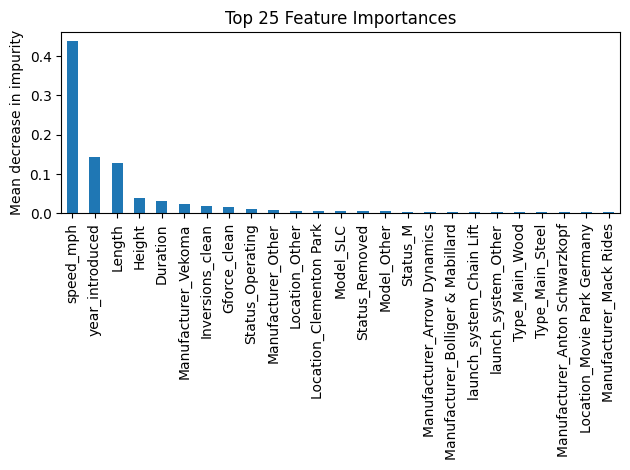

In [108]:
from matplotlib import pyplot as plt
import seaborn as sns

forest_importances = pd.Series(rf_coaster.feature_importances_, index = rf_coaster.feature_names_in_)

top_25_importances = forest_importances.sort_values(ascending=False).head(25)

fig, ax = plt.subplots()
top_25_importances.plot.bar(ax = ax)
ax.set_title("Top 25 Feature Importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

plt.show()

In [109]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_features': [10, 20, 30, 50, 100],
    'n_estimators': [1000, 1250, 1500]
}

rf = RandomForestRegressor(random_state = 12345)

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 10)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=12345),
             param_grid={'bootstrap': [True],
                         'max_features': [10, 20, 30, 50, 100],
                         'n_estimators': [1000, 1250, 1500]})

In [110]:
grid_search.best_params_

{'bootstrap': True, 'max_features': 20, 'n_estimators': 1000}

In [111]:
import numpy as np

X_train_r = X_train

X_train_r['random'] = np.random.normal(0, 1, 720)

In [112]:
rf_coaster_best_train = RandomForestRegressor(n_estimators = 1000,
                                max_features = 20,
                                random_state = 12345,
                                oob_score = True)

rf_coaster_best_train.fit(X_train_r, y_train)

RandomForestRegressor(max_features=20, n_estimators=1000, oob_score=True,
                      random_state=12345)

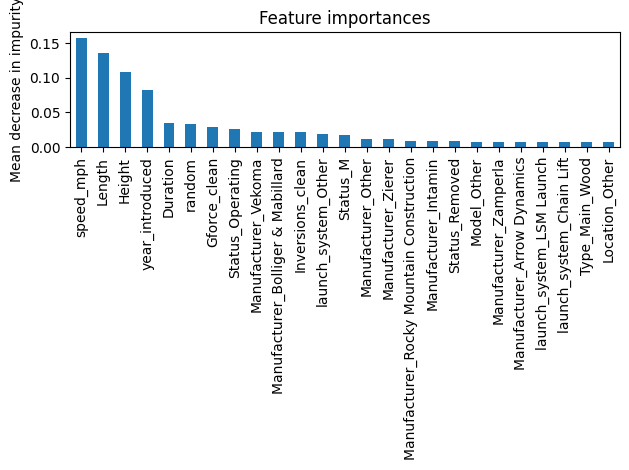

In [113]:
forest_importances = pd.Series(rf_coaster_best_train.feature_importances_, index = rf_coaster_best_train.feature_names_in_)

top_25_importances = forest_importances.sort_values(ascending=False).head(25)

fig, ax = plt.subplots()
top_25_importances.plot.bar(ax = ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

plt.show()

In [117]:
df = pd.read_csv("~/Documents/clean_coaster_full.csv")

In [118]:
df = df[["speed_mph", "Length", "Height", "year_introduced", "Duration", "Gforce_clean", "Inversions_clean", "Status", "coaster_rating", "Manufacturer"]]

In [119]:
categorical_columns = df.select_dtypes(include=['object']).columns

df = pd.get_dummies(df, columns=categorical_columns)

In [121]:
# Separating Training and Testing data (80% train, 20% test)
train, valid = train_test_split(df, train_size=0.8, random_state=12)

# Splitting the validation set into validation (10%) and test (10%)
valid, test = train_test_split(valid, test_size=0.5, random_state=12)

In [122]:
X_train = train.drop(["coaster_rating"], axis = 1)
y_train = train["coaster_rating"]

X_valid = valid.drop(["coaster_rating"], axis = 1)
y_valid = valid["coaster_rating"]

X_test = test.drop(["coaster_rating"], axis=1)
y_test = test["coaster_rating"]

In [123]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [1, 5, None],
    'max_features': [10, 15, 20, 25],
    'min_samples_split': [1, 2],
    'n_estimators': [1000, 1100, 1200, 1500]
}

rf = RandomForestRegressor(random_state = 54321)

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 10)

grid_search.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
480 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.1

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=54321),
             param_grid={'bootstrap': [True], 'max_depth': [1, 5, None],
                         'max_features': [10, 15, 20, 25],
                         'min_samples_split': [1, 2],
                         'n_estimators': [1000, 1100, 1200, 1500]})

In [124]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 10,
 'min_samples_split': 2,
 'n_estimators': 1200}

In [125]:
rf_coaster_best_train = RandomForestRegressor(n_estimators = 1200,
                                  max_features = 10,
                                  max_depth = None,
                                  min_samples_split = 2,
                                  random_state = 54321,
                                  oob_score = True)

rf_coaster_best_train.fit(X_train, y_train)

RandomForestRegressor(max_features=10, n_estimators=1200, oob_score=True,
                      random_state=54321)

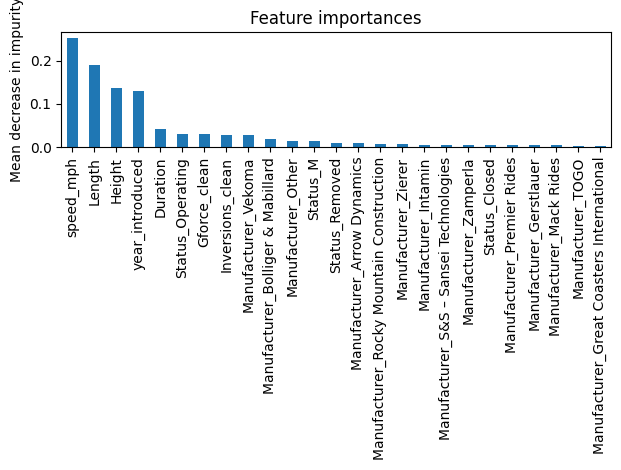

In [126]:
forest_importances = pd.Series(rf_coaster_best_train.feature_importances_, index = rf_coaster_best_train.feature_names_in_)

top_25_importances = forest_importances.sort_values(ascending=False).head(25)

fig, ax = plt.subplots()
top_25_importances.plot.bar(ax = ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

plt.show()

In [24]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# Make predictions on the training set
y_train_pred = rf_coaster_best_train.predict(X_train)
# train_full['predictions'] = y_train_pred_cv

# Calculate the Mean Absolute Error (MAE)
mae_train_cv = mean_absolute_error(y_train, y_train_pred)

# Calculate MAPE for training data
mape_train_cv = mean_absolute_percentage_error(y_train, y_train_pred)

# Print the MAE for the training data
print("MAE for Training data:", mae_train_cv)

# Print the MAPE
print("MAPE for Training Data: ", mape_train_cv)

MAE for Training data: 5.865336981860464
MAPE for Training Data:  0.2458015167570086


In [127]:
y_valid_pred_ = rf_coaster_best_train.predict(X_valid)

In [128]:
# Calculate the Mean Absolute Error (MAE) for validation data
mae_valid_cv = mean_absolute_error(y_valid, y_valid_pred_)

# Calculate MAPE for validation data
mape_valid_cv = mean_absolute_percentage_error(y_valid, y_valid_pred_)

# Print the MAE for the validation data
print("MAE for Validation data:", mae_valid_cv)

# Print the MAPE for the validation data
print("MAPE for Validation Data: ", mape_valid_cv)


MAE for Validation data: 11.983345577601442
MAPE for Validation Data:  0.8059698016689131


In [129]:
# Combine the training and validation sets
train_valid = pd.concat([train, valid], axis=0)

# Separate features and target for combined dataset
X_train_valid = train_valid.drop("coaster_rating", axis=1)
y_train_valid = train_valid["coaster_rating"]

In [130]:
rf_coaster_best_train.fit(X_train_valid, y_train_valid)

RandomForestRegressor(max_features=10, n_estimators=1200, oob_score=True,
                      random_state=54321)

In [131]:
y_test_pred = rf_coaster_best_train.predict(X_test)

In [132]:
# Calculate the Mean Absolute Error (MAE) for test data
mae_test_cv = mean_absolute_error(y_test, y_test_pred)

# Calculate MAPE for test data
mape_test_cv = mean_absolute_percentage_error(y_test, y_test_pred)

# Print the MAE for the test data
print("MAE for Test data:", mae_test_cv)

# Print the MAPE for the test data
print("MAPE for Test Data: ", mape_test_cv)

MAE for Test data: 9.89752431988539
MAPE for Test Data:  0.3532986661424269


In [133]:
import pandas as pd
import numpy as np

# Create a DataFrame with the actual and predicted values
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred
})
pd.set_option('display.max_rows', None)
# Display the DataFrame
print(comparison_df)

# Calculate the absolute percentage error for each row
comparison_df['APE'] = np.abs((comparison_df['Actual'] - comparison_df['Predicted']) / comparison_df['Actual']) * 100

# Calculate MAPE
mape = comparison_df['APE'].mean()

print(f"MAPE: {mape}")

     Actual  Predicted
554    19.6  16.454310
216    73.7  73.035944
401    59.8  47.791335
656    97.8  89.074667
10     48.1  20.872988
301    89.6  88.051379
116    63.7  60.080833
717    97.4  89.303722
727    94.6  93.260958
713    89.4  89.703889
367    47.9  45.150300
866    78.7  45.252986
274    34.0  49.256975
56     86.8  64.601492
349    63.2  54.023567
347    83.9  77.938694
754    25.4  30.174162
825    72.8  55.626000
637    73.3  72.820639
496    37.3  45.159886
597    64.2  63.733172
98     23.0  39.659542
494    66.5  63.820682
342    42.0  40.457599
566    62.1  53.084311
765    87.4  82.258389
615     9.3  23.325556
398    64.4  56.669733
218    30.3  28.782599
231    30.0  28.518942
791    85.5  86.151306
595    60.0  46.854040
235    15.0  22.143103
140    66.3  52.170196
551    18.3  43.861964
252    63.6  76.288324
581    23.9  39.591147
23     99.5  89.067192
547    73.7  60.520479
701    50.0  41.649375
515    25.4  23.881810
875    82.5  85.607458
639     6.3

In [136]:
y_train_pred_list = pd.Series(y_train_pred, index=y_train.index)
y_valid_pred_list = pd.Series(y_valid_pred_, index=y_valid.index)
y_test_pred_list = pd.Series(y_test_pred, index=y_test.index)

In [137]:
comparison_df = pd.concat([
    pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred_list}),
    pd.DataFrame({'Actual': y_valid, 'Predicted': y_valid_pred_list}),
    pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_list})
])

In [138]:
df = pd.read_csv("~/Documents/clean_coaster_full.csv")
accuracy = df["coaster_name"]

In [139]:
# Join on index
comparison_df = comparison_df.join(coaster_names)

# Move coaster_name to the first column for clarity
comparison_df = comparison_df[['coaster_name', 'Actual', 'Predicted']]

In [141]:
comparison_df['Closest'] = (comparison_df['Actual'] - comparison_df['Predicted']).abs()
comparison_df.head()

,coaster_name,Actual,Predicted,Closest
97,Canyon Blaster,28.2,70.626944,42.426944
638,Stealth,90.2,80.442206,9.757794
35,Balder,93.9,93.031300,0.868700
363,Kikkerachtbaan,11.1,61.376033,50.276033
840,WhirlWind,41.9,89.471347,47.571347


In [143]:
comparison_df.sort_values(by="Closest", ascending=False)

,coaster_name,Actual,Predicted,Closest
215,Flight Deck,1.7,92.095634,90.395634
691,T3,5.2,93.571928,88.371928
609,Sky Scrapper,96.6,9.638153,86.961847
665,Super Grover's Box Car Derby,6.9,92.598865,85.698865
459,Ninja,6.3,91.069929,84.769929
283,Grover's Alpine Express,10.9,95.316793,84.416793
58,Behemoth,93.6,10.056170,83.543830
267,Goliath,94.6,11.083517,83.516483
606,Silver Streak,11.4,94.348266,82.948266
82,Boomerang,6.9,89.019378,82.119378
